In [104]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.layers.experimental.preprocessing import Rescaling, Resizing
import zipfile
import os

2502041956 - Nicholas Javier - LA05 (SOAL UTS NOMOR 2)  
Link Youtube(ada di 1f): https://youtu.be/lPy6cQ8z3GM

### Nomor 2

IMPORT DATA


In [105]:
archive_zip = '/content/Data B.zip'
extract_zip = zipfile.ZipFile(archive_zip, 'r')
extract_zip.extractall('/content')
extract_zip.close()

In [106]:
from keras.src.utils.data_utils import validate_file
traindata = os.path.join('/content/Data B/dataset','train')
valdata = os.path.join('/content/Data B/dataset','val')
testdata = os.path.join('/content/Data B/dataset','test')

# 2a


In [107]:
traingen = ImageDataGenerator(
                           rescale = 1./255,
                           rotation_range = 15,
                           horizontal_flip = True,
                           fill_mode = 'nearest',)

valgen = ImageDataGenerator(rescale = 1./255)

testgen = ImageDataGenerator(rescale = 1./255)

In [108]:
num_size = 75

generator_train = traingen.flow_from_directory(
    traindata,
    target_size=(64, 64),
    batch_size=num_size,
    class_mode='categorical'
)

generator_val = valgen.flow_from_directory(
    valdata,
    target_size=(64, 64),
    batch_size=num_size,
    class_mode='categorical'
)

generator_tes = testgen.flow_from_directory(
    testdata,
    target_size=(64, 64),
    batch_size=num_size,
    class_mode='categorical'
)

Found 168 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [109]:
generator_train_big = traingen.flow_from_directory(
    traindata,
    target_size=(224, 224),
    batch_size=num_size,
    class_mode='categorical'
)

generator_val_big = valgen.flow_from_directory(
    valdata,
    target_size=(224, 224),
    batch_size=num_size,
    class_mode='categorical'
)

generator_tes_big = testgen.flow_from_directory(
    testdata,
    target_size=(224, 224),
    batch_size=num_size,
    class_mode='categorical'
)

Found 168 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


### Penjelasan untuk nomor 2a yang pertama kita mengimpor file data B dikarenakan saya memiliki NIM 2502041956. Setelah itu kita hubungkan google colab ke 3 path tersebut yaitu train,val,data dari dataset. Setelah itu kita memasukan data train,val,test dimana generator train masi perlu beberapa parameter tetapi tidak untuk val dan test. Setelah itu kita melakukan augmented test images dengan size (64,64).

# 2b


In [114]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
s1 = 96
s2 = 256
s3 = 384
s4 = 4096
number_cate = 2

cnnsimplemodel = tf.keras.models.Sequential([
    tf.keras.Input(shape=(224,224,3)),

    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(11,11),filters = s1,strides = 4),

    tf.keras.layers.MaxPooling2D(strides = 2,pool_size = (3,3)),

    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(5,5),filters = s2),
    tf.keras.layers.ZeroPadding2D(padding = 2),

    tf.keras.layers.MaxPooling2D(strides = 2,pool_size = (3,3)),

    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(3,3),filters = s3),
    tf.keras.layers.ZeroPadding2D(padding = 1),

    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(3,3),filters = s3),
    tf.keras.layers.ZeroPadding2D(padding = 1),

    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(3,3),filters = s2),
    tf.keras.layers.ZeroPadding2D(padding = 1),

    tf.keras.layers.MaxPooling2D(strides = 2,pool_size = (3,3)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(s4, activation = 'relu'),

    tf.keras.layers.Dense(s4, activation = 'relu'),

    tf.keras.layers.Dense(number_cate, activation = 'softmax'),

])

cnnsimplemodel.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics =["accuracy"] )

sum_cnnsimplemodel = cnnsimplemodel.summary()
sum_cnnsimplemodel

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_101 (Conv2D)         (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_102 (Conv2D)         (None, 22, 22, 256)       614656    
                                                                 
 zero_padding2d_68 (ZeroPad  (None, 26, 26, 256)       0         
 ding2D)                                                         
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 12, 12, 256)       0         
 ng2D)                                                           
                                                     

In [115]:
cnnsimplemodel_result = cnnsimplemodel.fit(generator_train_big,
                                           validation_data = generator_val_big,
                                           epochs = 10)

Epoch 1/10
3/3 [==============================] - 31s 8s/step - loss: 0.8737 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 27s 7s/step - loss: 0.7027 - accuracy: 0.4940 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 28s 7s/step - loss: 0.6942 - accuracy: 0.4821 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 28s 7s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 27s 12s/step - loss: 0.6935 - accuracy: 0.4821 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 27s 11s/step - loss: 0.6958 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 29s 12s/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 8/10
3/3 [===============

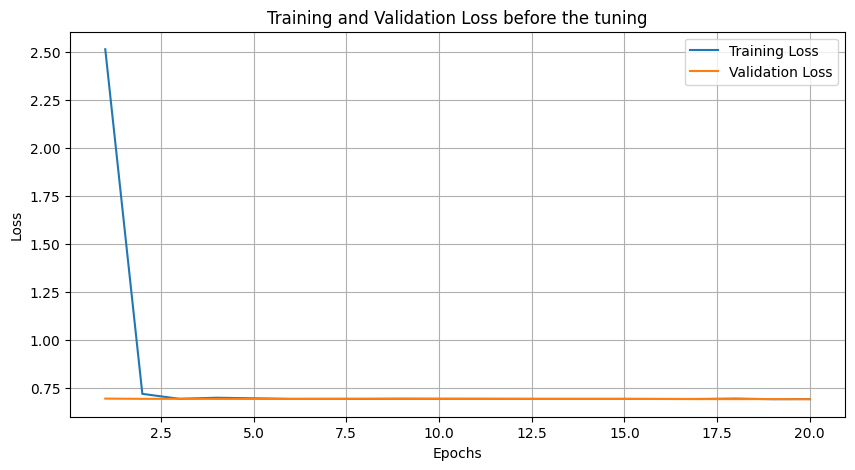

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def plot1_training_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss before the tuning')
    plt.legend()
    plt.grid(True)
    plt.show()

plot1_training_history(cnnsimplemodel_result)

Penjelasan untuk nomor 2b, dari grafik dapat dilihat bahwa fit tetapi model masih belum bisa dipelajari dengan baik sehingga harus diarahkan untuk menjadi model yang lebih baik.

# 2c


In [117]:
model_new_cnn = tf.keras.models.Sequential([
    tf.keras.Input(shape=(224,224,3)),

    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(11,11),filters = s1,strides = 4),

    tf.keras.layers.MaxPooling2D(strides = 2,pool_size = (3,3)),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(5,5),filters = s2),
    tf.keras.layers.ZeroPadding2D(padding = 2),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(strides = 2,pool_size = (3,3)),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(3,3),filters = s3),
    tf.keras.layers.ZeroPadding2D(padding = 1),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(3,3),filters = s3),
    tf.keras.layers.ZeroPadding2D(padding = 1),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(activation = 'relu',kernel_size=(3,3),filters = s2),
    tf.keras.layers.ZeroPadding2D(padding = 1),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(strides = 2,pool_size = (3,3)),
    tf.keras.layers.Dropout(0.75),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(s4, activation = 'relu'),

    tf.keras.layers.Dense(s4, activation = 'relu'),

    tf.keras.layers.Dense(number_cate, activation = 'softmax'),
])

model_new_cnn.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics =["accuracy"] )

sum_cnnsimplemodelnew = model_new_cnn.summary()
sum_cnnsimplemodelnew

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 26, 26, 96)        0         
                                                                 
 batch_normalization (Batch  (None, 26, 26, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_108 (Conv2D)         (None, 22, 22, 256)       614656    
                                                                 
 zero_padding2d_72 (ZeroPad  (None, 26, 26, 256)     

In [118]:
cnnsimplemodelnew_result = model_new_cnn.fit(generator_train_big,
                                           validation_data = generator_val_big,
                                           epochs = 10)

Epoch 1/10
3/3 [==============================] - 71s 26s/step - loss: 6.2774 - accuracy: 0.5357 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 29s 12s/step - loss: 1.9574 - accuracy: 0.4762 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 33s 14s/step - loss: 1.3558 - accuracy: 0.5714 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 37s 8s/step - loss: 1.2800 - accuracy: 0.4167 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 28s 12s/step - loss: 0.9573 - accuracy: 0.4762 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 29s 12s/step - loss: 0.7222 - accuracy: 0.5774 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 29s 8s/step - loss: 0.7380 - accuracy: 0.5238 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 8/10
3/3 [=============

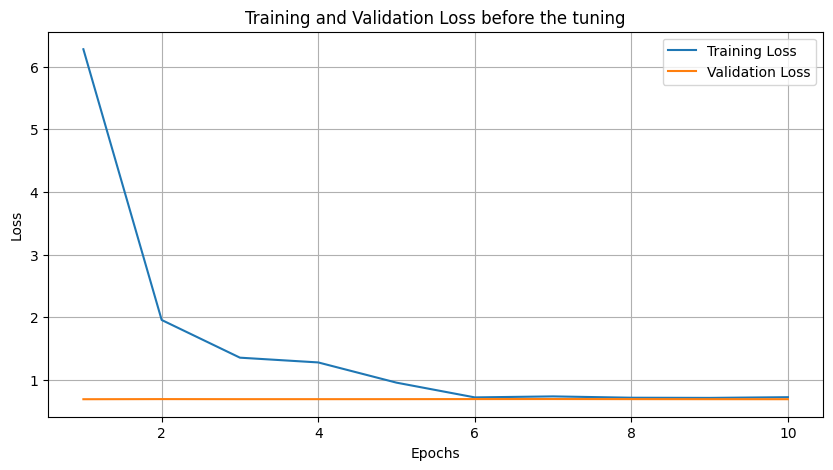

In [119]:
def plot2_training_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss before the tuning')
    plt.legend()
    plt.grid(True)
    plt.show()

plot2_training_history(cnnsimplemodelnew_result)

Penjelasan untuk nomor 2c dibandingkan dengan 2b, accuracy dari modelnya naik sedikit tetapi tidak stabil dan sudah fit, tetapi seperti sebelumnya model tersebut belum bisa dibiarkan latih sendiri sehingga harus diarahkan

# 2d


In [120]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

1/1 [==============================] - 1s 546ms/step
Anemone Dahlias


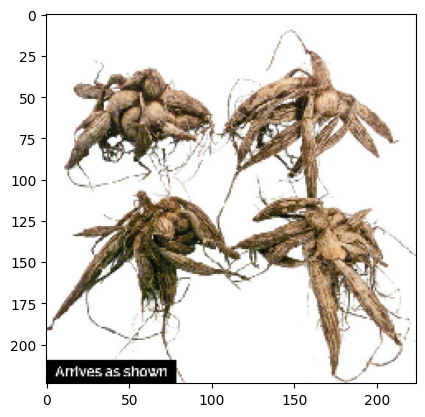

In [128]:
img = image.load_img("/content/Data B/dataset/test/Anemone Dahlias/Image_106.jpg", target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
prediction1 = cnnsimplemodel.predict(img_preprocessed)
if prediction1[0][0] < 0.5:
  print('Anemone Dahlias')
elif prediction1[0][0] >= 0.5:
  print('Ball Dahlias')

plt.imshow(img)

1/1 [==============================] - 0s 95ms/step
Anemone Dahlias


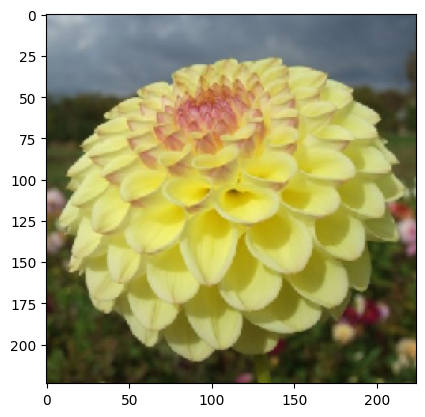

In [129]:
img = image.load_img("/content/Data B/dataset/test/Ball Dahlias/Image_107.jpg", target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
prediction1 = cnnsimplemodel.predict(img_preprocessed)
if prediction1[0][0] < 0.5:
  print('Anemone Dahlias')
elif prediction1[0][0] >= 0.5:
  print('Ball Dahlias')

plt.imshow(img)

#2e

Link youtube : https://youtu.be/lPy6cQ8z3GM